In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("D:\PYTHON\ML\iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df=data.drop('Species', axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

Text(0.5, 1.0, 'Sepal Length and Sepal Width')

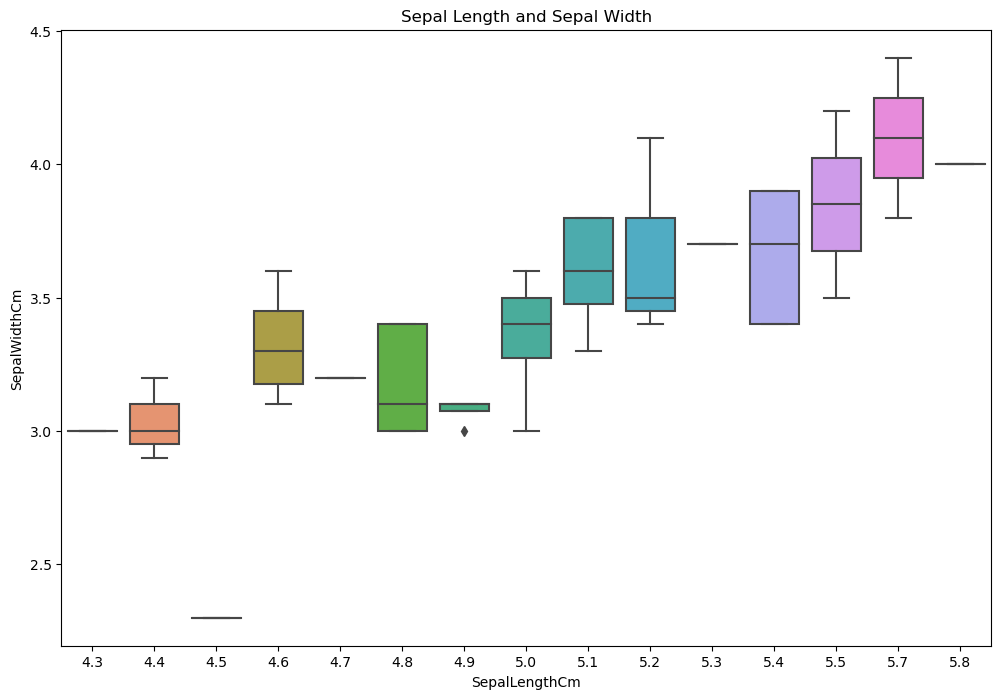

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['SepalLengthCm'][:50],y=df['SepalWidthCm'][:50],data=df)
plt.title("Sepal Length and Sepal Width")

Text(0.5, 1.0, 'petal length and petal width')

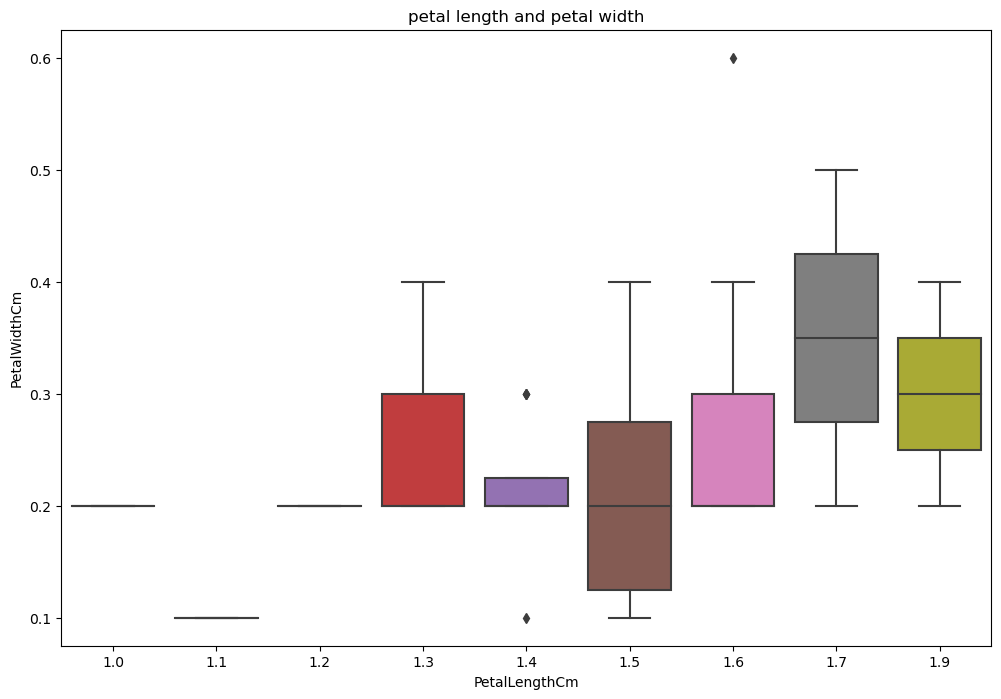

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['PetalLengthCm'][:50],y=df['PetalWidthCm'][:50],data=df)
plt.title("petal length and petal width")

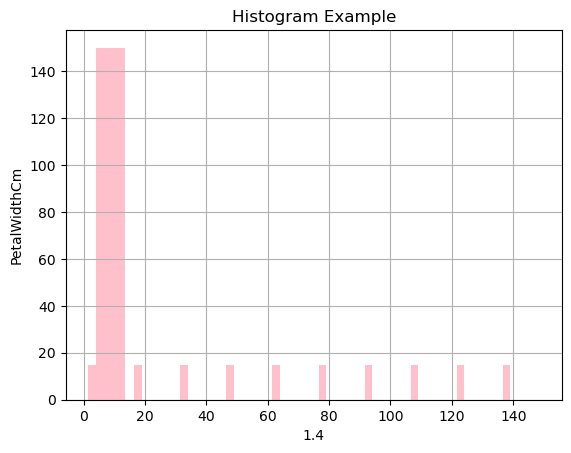

In [10]:
plt.hist(df, 10, density=False, facecolor='pink')
#density = false means our width of bar will be same
plt.xlabel(df['PetalLengthCm'].iloc[0])
plt.ylabel('PetalWidthCm')
plt.title('Histogram Example')

plt.grid(True)

plt.show()


In [11]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [12]:
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [13]:
select_df=df[features]

In [14]:
select_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X = StandardScaler().fit_transform(select_df)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [16]:
kmeans = KMeans()
model = kmeans.fit(X)

In [17]:
centers = model.cluster_centers_
centers

array([[-3.64080601e-01, -1.41420269e+00,  1.07449102e-01,
         1.75297293e-03],
       [-1.38535265e+00, -3.49675592e-02, -1.33811320e+00,
        -1.33488889e+00],
       [ 8.52214022e-01,  1.83579686e-01,  8.61325863e-01,
         1.04477187e+00],
       [ 2.23487405e-01, -5.17057070e-01,  5.17920195e-01,
         4.76516476e-01],
       [ 1.83771270e+00, -4.02641159e-01,  1.39965453e+00,
         1.01409484e+00],
       [-5.47274882e-01,  2.01551983e+00, -1.27019027e+00,
        -1.21437200e+00],
       [ 2.12851559e+00,  1.57199748e+00,  1.50201279e+00,
         1.36030700e+00],
       [-9.61265106e-01,  9.27925890e-01, -1.29577984e+00,
        -1.20779835e+00]])